# Ley de Benford

*La [ley de los números anómalos de Frank Benford](https://es.wikipedia.org/wiki/Ley_de_Benford) postula que en muchos conjuntos de datos la frecuencia de aparición de las cifras del 1 al 9 como primer dígito dista mucho de ser uniforme.*

*En este ejercicio debes definir una función frecuencia_cifras que admita un único argumento que es una lista de números. La función debe calcular la frecuencia de las cifras de 1 a 9 como primera cifra de los números que se pasan como argumento. El resultado debe ser una tupla de nueve elementos en la que el primer elemento es la frecuencia del 1, el segundo elemento es la frecuencia del 2, etc. La frecuencia de una cifra se medirá como la cantidad de números que empiezan por esa cifra dividida por el total de números en el argumento.*

### Ejemplo de funcionamiento:

``` Python
>>> frecuencia_cifras(range(200))
(0.555, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055)
```

### Solución

El problema está relacionado con la ley de Benford, pero lo que se pide no tiene nada que ver con esa ley.  Solo nos pide que calculemos las frecuencias de las cifras de 1 a 9 en un conjunto de números.

Primero obtenemos la lista de las primeras cifras.  Luego contamos.

In [1]:
def frecuencia_cifras(l):
    primeras, N = tuple(int(str(abs(x))[0]) for x in l ), len(l)
    return tuple(primeras.count(i)/N for i in range(1,10))

Y probamos con el ejemplo del enunciado como mínimo.

In [2]:
frecuencia_cifras(range(200))

(0.555, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055)

# Error cuadrático medio

*Siguiendo con el ejemplo de la ley de Benford, en este ejercicio debes definir una función ecm_benford que admita un único argumento que es una tupla de nueve números correspondientes a las frecuencias de aparición de cada una de las cifras de 1 a 9 (ver ejercicio anterior para ver un ejemplo). La función debe calcular el error cuadrático medio respecto a la probabilidad ideal de cada cifra según la ley de Benford, que responde a la ecuación:*

$$ p(n) = log_{10}(n+1) - log_{10}(n) $$

### Ejemplo de funcionamiento:

``` Python
>>> ecm_benford((1,0,0,0,0,0,0,0,0))
0.06259926375341245
```

### Solución

Evidentemente nos piden calcular un error cuadrático medio, pero el valor de referencia teórico es el correspondiente a la ley de Benford.

In [3]:
from math import log10

def ecm_benford(medida):
    ideal = tuple(log10(n+1) - log10(n) for n in range(1,10))
    return ecm(medida, ideal)

def ecm(x,y):
    assert(len(x) == len(y))
    return sum((xi - yi)**2 for xi,yi in zip(x,y))/len(x)

Ahora probamos al menos con el ejemplo del enunciado.

In [4]:
ecm_benford((1,0,0,0,0,0,0,0,0))

0.06259926375341245

# Problema del asno de Buridán

*El asno de Buridán es el protagonista de un argumento de reducción al absurdo contra Jean Buridan.*

*En dos lugares de un prado se colocan dos montones iguales de alfalfa. El asno se dirige a uno de ellos y, cuando ha recorrido la mitad de la distancia, se dirige hacia el otro montón, repitiéndose el cambio de dirección cada vez que recorre la mitad de la distancia que le separa del montón a donde se dirige.*

*Tomaremos el origen en uno de los montones de alfalfa y el otro montón asumimos que se encuentra a una distancia unidad del origen. El asno inicialmente se encuentra en algún punto a de la recta que une ambos montones.*

*La sucesión xn que representa la distancia del asno al origen a lo largo del proceso se define por:*

$$ x_1 = a, (0 < a < 1) \\
 x_{2n} = \frac{x_{2n-1}}{2} \\
x_{2n+1} = \frac{1 + x_{2n}}{2}
$$

*Definir una función `buridan(a,n)` que devuelve el valor de $x_n$.*

### Solución

El ejercicio nos define directamente una recurrencia, solo hay que escribirla en Python. La unica dificultad estriba en que la recurrencia se define para términos pares y para términos impares de forma diferente.

In [15]:
def buridan(a,n):
    if n == 1: return a
    if n%2 == 0: return buridan(a,n-1)/2
    return (1+buridan(a,n-1))/2

Probemos la función:

In [16]:
[buridan(0.1, n) for n in range(1,20)]

[0.1,
 0.05,
 0.525,
 0.2625,
 0.63125,
 0.315625,
 0.6578125,
 0.32890625,
 0.664453125,
 0.3322265625,
 0.66611328125,
 0.333056640625,
 0.6665283203125,
 0.33326416015625,
 0.666632080078125,
 0.3333160400390625,
 0.6666580200195312,
 0.3333290100097656,
 0.6666645050048828]

Podemos verlo mejor en una gráfica.

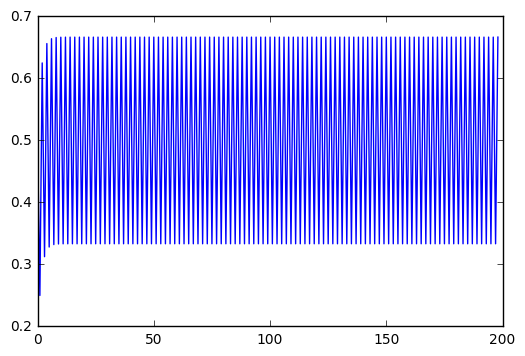

In [17]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.plot([buridan(0.5, n) for n in range(1,200)])

# Triángulo numérico

*Escribir una función triangulo_numerico sin argumentos que encuentre las cifras del 1 al 9 que deben escribirse en los círculos de la siguiente figura para que la suma de cualquiera de sus lados valga 20.*

*Cada círculo debe contener una cifra diferente. La función debe devolver una tupla o lista con la secuencia de las cifras que va en cada círculo empezando por el superior y en el sentido de las agujas del reloj.*

### Solución

El problema es extremadamente simple si tenemos en cuenta que se dispone de todos los ejercicios resueltos en el CampusVirtual.  Nos piden encontrar una permutación de los números de 1 a 9 que cumpla una serie de restricciones.  

Como vimos en el ejemplo de las [Ocho Damas](Problema de las ocho damas.ipynb) todas las permutaciones de ocho números era un número ridículo para un ordenador.  En este caso es con nueve números pero aún así es ridícula la cantidad de cálculos (solo nueve veces el caso de las ocho damas).  Por tanto es perfectamente asumible utilizar fuerza bruta, y de hecho podemos copiar directamente el algoritmo del problema de las ocho damas.

In [18]:
from itertools import permutations

def triangulo_numerico():
    for p in permutations(range(1,10)):
        if es_solucion(p):
            return p
    raise ValueError('No hay solución')

Ya solo queda comprobar cuando una lista de nueve dígitos es solución.  Para ello concatenamos el primer elemento al final y comprobamos los rangos correspondientes a cada segmento.

In [23]:
def es_solucion(p):
    l = p + (p[0],)
    return all(20 == sum(l[i:i+4]) for i in (0,3,6))

Ya solo queda probarlo.

In [24]:
triangulo_numerico()

(1, 3, 7, 9, 2, 4, 5, 6, 8)